<a href="https://colab.research.google.com/github/Vakhranev/MGIMO/blob/main/28%20%D1%84%D0%B5%D0%B2%D1%80%D0%B0%D0%BB%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Исследование взаимосвязей между переменными

**Статистические тесты Python**

Как обычно, сначала импортируем все необходимое:

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
sns.set()
rcParams['figure.figsize'] = 10, 6
%config InlineBackend.figure_format = 'svg'
np.random.seed(42)

Допустим, изначально показатели выглядят вот так:

148fc2b253952e2994d7a369321c13dd.svg

По прошествии эксперимента руководитель снова посчитал метрики и увидел вот такие цифры:

2ef3a1e2c921ee1c0773552e277b2276.svg

Если интересны случаи, когда незнание или неправильное понимание статистики и теории вероятностей очень сильно вредило людям, то можно почитать следующие книги:

* "Голая статистика" Чарльза Уилана;

* "Как лгать при помощи статистики" Дарелла Хаффа;

* "Парадоксы в теории вероятностей и математической статистике" Габора Секея.

В этом случае лучше всего воспользоваться эмпирической функцией распределения вероятностей:

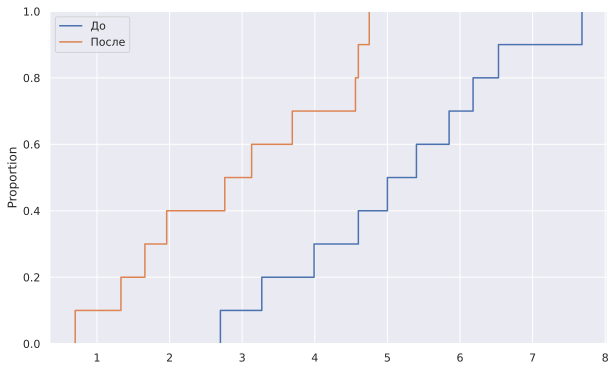

In [2]:
x1 = np.array([7.68,5.40,3.99,3.27,2.70,5.85,6.53,5.00,4.60,6.18])
x2 = np.array([1.33,1.66,2.76,4.56,4.75,0.70,3.13,1.96,4.60,3.69])

fig, ax = plt.subplots()
sns.ecdfplot(x=x1, ax=ax, label='До ')
sns.ecdfplot(x=x2, ax=ax, label='После')
ax.legend()

Распределение сместилось влево, хотя это вовсе не значит, что все работники показали улучшение результата (определенный индекс соответствует определенному работнику), это можно заметить по значениям метрик, или лучше нарисовать вот такой график:

<BarContainer object of 10 artists>

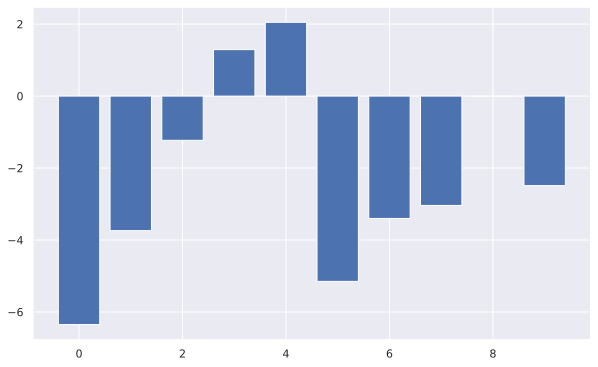

In [3]:
plt.bar(np.arange(10), (x2-x1))

Можно попробовать выкрутиться, просто добавив поясняющий заголовок:

Text(0, 0.5, 'Дельта')

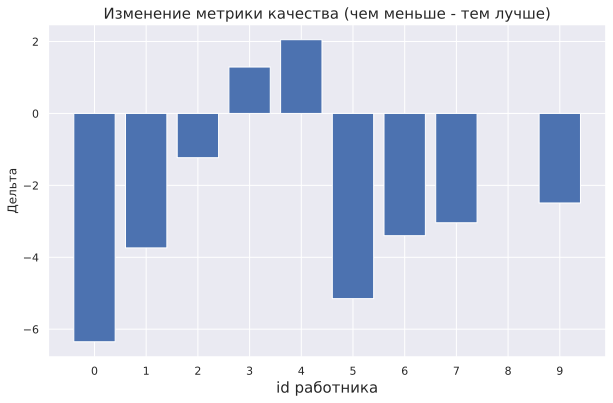

In [4]:
plt.bar(np.arange(10), (x2-x1))
plt.xticks(np.arange(10));
plt.title('Изменение метрики качества (чем меньше - тем лучше)',
          fontsize=15)
plt.xlabel('id работника', fontsize=15)
plt.ylabel('Дельта')

Хотя руководитель может отобразить результаты и так:

Text(0, 0.5, 'Дельта')

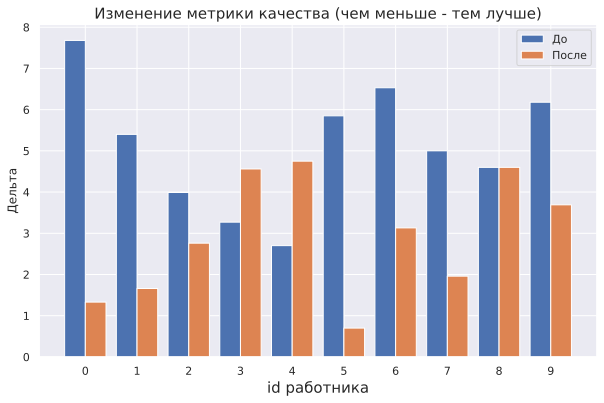

In [5]:
plt.bar(np.arange(10) - 0.2, x1, width=0.4, label='До')
plt.bar(np.arange(10) + 0.2, x2, width=0.4, label='После')
plt.xticks(np.arange(10))
plt.legend()
plt.title('Изменение метрики качества (чем меньше - тем лучше)',
          fontsize=15)
plt.xlabel('id работника', fontsize=15)
plt.ylabel('Дельта')

Первое, что приходит в голову - выполнить t-тест Стьюдента для зависимых выборок:

In [6]:
stats.ttest_rel(x2, x1)

TtestResult(statistic=-2.5653968678354184, pvalue=0.03041662395965993, df=9)

На уровне значимости *α*=0.05 c p-value равным 0.03 можно сделать вывод о том, что результат оказался статистически значимым.

У нас есть две выборки со следующими статистиками:

In [7]:
print(f'mean(x1) = {x1.mean():.3}')
print(f'mean(x2) = {x2.mean():.3}')
print('-'*15)
print(f'std(x1) = {x1.std(ddof=1):.3}')
print(f'std(x2) = {x2.std(ddof=1):.3}')

mean(x1) = 5.12
mean(x2) = 2.91
---------------
std(x1) = 1.53
std(x2) = 1.47


Для того, чтобы посмотреть на то, как будут распределены выборочные дисперсии двух генеральных совокупностей, сгенерируем по 5000 выборок из распределений *N*(5, 1.5^2) и *N*(3, 1.5^2) по 10 элементов в каждой выборке, затем вычислим выборочную дисперсию для каждой из них:

<Axes: ylabel='Count'>

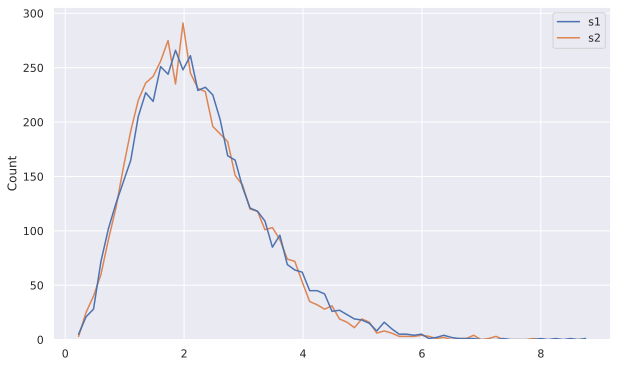

In [8]:
samples = stats.norm.rvs(loc=(5, 3), scale=1.5, size=(5000, 10, 2))
deviations = samples.var(axis=1, ddof=1)
deviations_df = pd.DataFrame(deviations, columns=['s1', 's2'])

sns.histplot(data=deviations_df, element="poly", color='r', fill=False)

Иногда бывает так, что абсолютно никому нет дела до вашего кода, - главное результат. Поэтому появляется соблазн генерировать вот такую ерунду:

<Axes: ylabel='Count'>

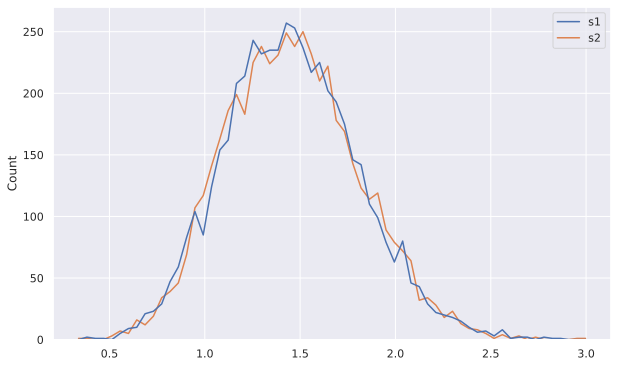

In [9]:
sns.histplot(data=pd.DataFrame(np.std(stats.norm.rvs(loc=(5, 3), scale=1.5, size=(5000,10,2)), axis=1, ddof=1), columns=['s1', 's2']), element="poly", color='r', fill=False)

Если есть хоть какая-то вероятность того, что к этому коду придется вернуться, то лучше оформлять код в более понятном виде:

* простое - разделяется на шаги;

* сложное разделяется на шаги и снабжается комментариями;

* запутанное разбивается на шаги, снабжается комментариями и пояснениями.

Оценить параметры распределения можно с помощью метода максимального правдоподобия, который реализован в методе **fit()**:

In [10]:
df1, loc1, scale1 = stats.chi2.fit(deviations_df['s1'], fdf=10)
print(f'df1 = {df1}, loc1 = {loc1:<8.4}, scale1 = {scale1:.3}')

df2, loc2, scale2 = stats.chi2.fit(deviations_df['s2'], fdf=10)
print(f'df2 = {df2}, loc2 = {loc2:<8.4}, scale1 = {scale2:.3}')

df1 = 10, loc1 = -0.1027 , scale1 = 0.238
df2 = 10, loc2 = -0.08352, scale1 = 0.231


Text(0.5, 0, 's')

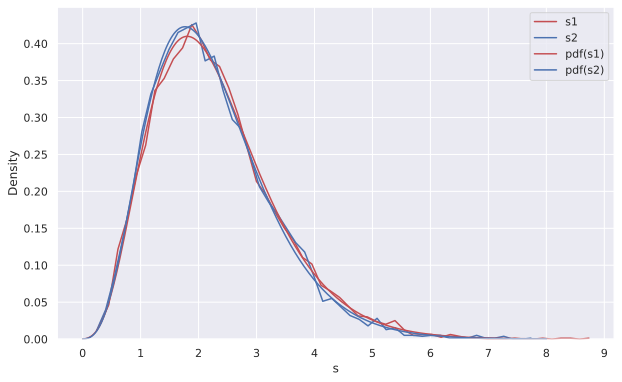

In [11]:
fig, ax = plt.subplots()

# гистограммы придется рисовать по отдельности, иначе
# площадь под каждой из них будет равна 0.5 а не 1:
sns.histplot(data=deviations_df['s1'], color='r', element='poly',
             fill=False, stat='density', label='s1', ax=ax)
sns.histplot(data=deviations_df['s2'], color='b', element='poly',
             fill=False, stat='density', label='s2', ax=ax)


chi2_rv1 = stats.chi2(df1, loc1, scale1)
chi2_rv2 = stats.chi2(df2, loc2, scale2)
x = np.linspace(0, 8, 300)
sns.lineplot(x=x, y=chi2_rv1.pdf(x), color='r', label='pdf(s1)', ax=ax)
sns.lineplot(x=x, y=chi2_rv2.pdf(x), color='b', label='pdf(s2)', ax=ax)
ax.set_xticks(np.arange(10))
ax.set_xlabel('s')

Если вы покопаетесь в [журналах](https://www.jstatsoft.org/index), то с удивлением обнаружите, что математическая статистика проскользнула практически во все разделы математики, что как минимум, занимательно.

У нас есть функции распределения плотности вероятности для выборочных дисперсий, взятых из двух генеральных совокупностей, распределенных как *N*(5, 1.5^2) и *N*(3, 1.5^2).

Допустим, мы извлекли выборку из десяти элементов стандартное отклонение которой равно 2, может ли выборка с таким отклонением быть получена случайно из генеральной совокупности с распределением *N*(5, 1.5^2)?

Text(0.5, 0, 's')

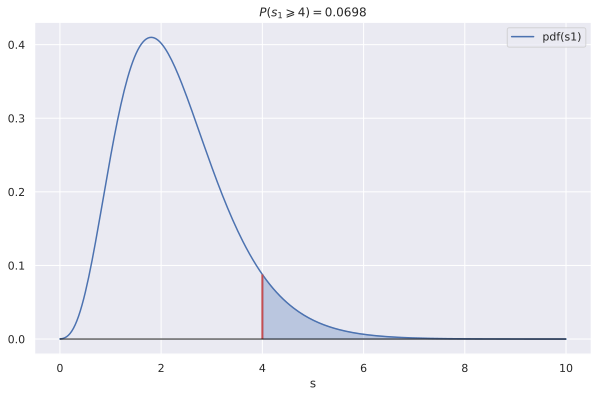

In [12]:
fig, ax = plt.subplots()

var = 2**2
x = np.linspace(0, 10, 300)

sns.lineplot(x=x, y=chi2_rv1.pdf(x), label='pdf(s1)', ax=ax)
ax.vlines(var, 0, chi2_rv1.pdf(var), color='r', lw=2)


ax.fill_between(x[x>var], chi2_rv1.pdf(x[x>var]),
                np.zeros(len(x[x>var])), alpha=0.3, color='b')
ax.hlines(0, x.min(), x.max(), lw=1, color='k')

p = chi2_rv1.sf(var)
ax.set_title(f'$P(s_{1} \geqslant  {var}) = $' + '{:.3}'.format(p))
ax.set_xlabel('s')

Полученное p-value не так уж и велико, а это значит, что получить выборку, состоящую из 10 элементов из генеральной совокупности с распределением *N*(5, 1.5^2) и выборочным стандартным отклонением *s* ≥ 2 не так то уж и просто. Впору засомневаться в том, что отклонение генеральной совокупности *σ* действительно равно 1.5. Однако, если уровень значимости задан как *α*=0.05, то мы все-таки должны признать, что получение выборки с таким отклонением обусловлено случайностью.

С другой стороны, мы всегда можем задать какую-то область, вероятность попадания в которую будет равна заданному значению, например 0.1:

Text(0.5, 0, 's')

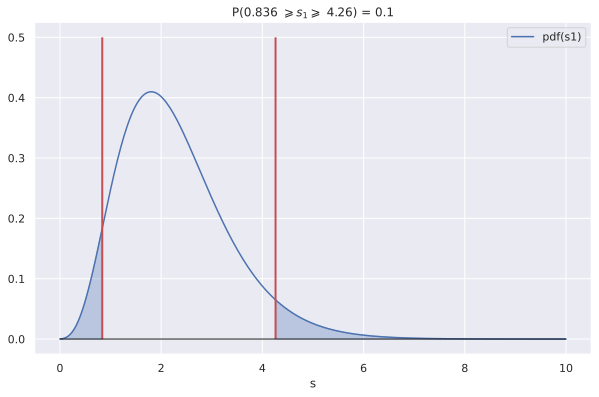

In [13]:
fig, ax = plt.subplots()

x = np.linspace(0, 10, 300)
sns.lineplot(x=x, y=chi2_rv1.pdf(x), label='pdf(s1)', ax=ax)

# определяем критические значения:
ci_left, ci_right = chi2_rv1.interval(0.9)
ax.vlines([ci_left, ci_right], 0, 0.5, color='r', lw=2)

x_le_ci_l, x_ge_ci_r = x[x<ci_left], x[x>ci_right]
ax.fill_between(x_le_ci_l, chi2_rv1.pdf(x_le_ci_l),
                np.zeros(len(x_le_ci_l)), alpha=0.3, color='b')
ax.fill_between(x_ge_ci_r, chi2_rv1.pdf(x_ge_ci_r),
                np.zeros(len(x_ge_ci_r)), alpha=0.3, color='b')


ax.set_title(f'P({ci_left:.3} $\geqslant  s_{1} \geqslant$ {ci_right:.3}) = 0.1')


ax.hlines(0, x.min(), x.max(), lw=1, color='k')
ax.set_xlabel('s')

Если отклонение от вершины распределения превысит указанный диапазон, то с *α*=0.1 мы можем утверждать, что данное отклонение обусловлено какими-то факторами, повлиявшими на генеральную совокупность, но не случайностью.

Давайте взглянем, как распределена величина:

bb0aa6a24dfd6865b867d2bd690b26ad.svg

где *i* это номер выборки:

<Axes: xlabel='None', ylabel='Density'>

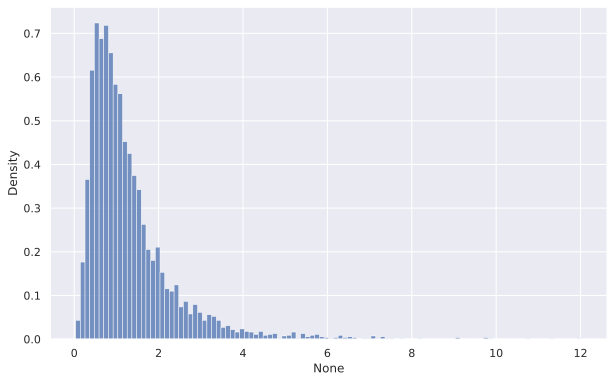

In [14]:
rel_dev = deviations_df['s1'] / deviations_df['s2']
sns.histplot(x=rel_dev, stat='density')

Перед нами распределение Фишера, узнать параметры которого можно с помощью все того же метода **fit()**:

In [15]:
dfn, dfd, loc, scale = stats.f.fit(rel_dev, fdfn=10, fdfd=10)
print(f'dfn = {dfn}, dfd = {dfd}, loc2 = {loc2:<8.4}, scale1 = {scale2:.3}')

dfn = 10, dfd = 10, loc2 = -0.08352, scale1 = 0.231


(0.0, 8.0)

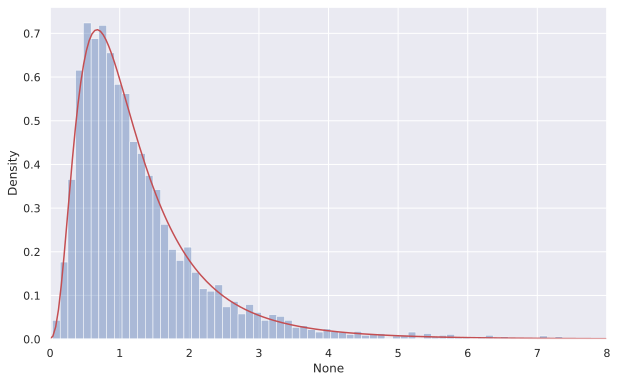

In [16]:
fig, ax = plt.subplots()
rel_dev = deviations_df['s1'] / deviations_df['s2']
sns.histplot(x=rel_dev, stat='density', alpha=0.4)

f_rv = stats.f(dfn, dfd, loc, scale)
x = np.linspace(0, 12, 300)
ax.plot(x, f_rv.pdf(x), color='r')
ax.set_xlim(0, 8)

Если из первой генеральной совокупности была извлечена выборка с дисперсией равной 3, а из второй совокупности выборка с дисперсией равной 1, то получить случайным образом две такие выборки будет крайне трудно:

Text(0.5, 0, 's')

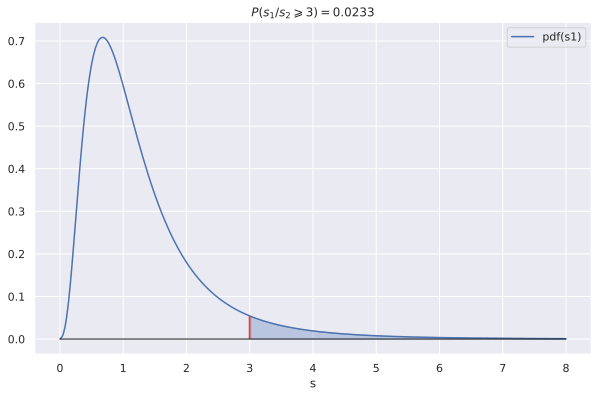

In [17]:
fig, ax = plt.subplots()

rel_var = 3
x = np.linspace(0, 8, 300)

sns.lineplot(x=x, y=f_rv.pdf(x), label='pdf(s1)', ax=ax)
ax.vlines(rel_var, 0, f_rv.pdf(rel_var), color='r', lw=2)
ax.fill_between(x[x>rel_var], f_rv.pdf(x[x>rel_var]),
                np.zeros(len(x[x>rel_var])), alpha=0.3, color='b')
ax.hlines(0, x.min(), x.max(), lw=1, color='k')

p = f_rv.sf(var)
ax.set_title(f'$P(s_{1}/s_{2} \geqslant  {rel_var}) = $' + '{:.3}'.format(p))
ax.set_xlabel('s')

То есть, если мы будем попарно извлекать две выборки по 10 элементов в каждой из двух генеральных совокупностей с распределениями *N*(5, 1.5^2) и *N*(3, 1.5^2), то вероятность того, что отношение дисперсий этих выборок окажется равным или большим 3, составит всего 0.023.

Отношение выборочных дисперсий в нашем примере равно:

In [18]:
np.var(x1, ddof=1) / np.var(x2, ddof=1)

1.083553459313125

Давайте воспользуемся функцией **f_oneway()** и посмотрим на результат (чем меньше значение pvalue, тем меньше вероятность того, что средние генеральных совокупностей равны):

In [19]:
stats.f_oneway(x1, x2)

F_onewayResult(statistic=10.786061383971454, pvalue=0.0041224402038065235)

На самом деле принцип работы выполненного выше теста чрезвычайно прост, и мы можем легко воспроизвести работу функции f_oneway(), для чего нам понадобятся всего две формулы:

a14ab89770dbd3b8654fcc5812deb917.svg

49a7d59cb4dfcd0dee5935dfdfb7beae.svg

In [20]:
m1, m2, m = *np.mean((x1, x2), axis=1), np.mean((x1, x2))

ms_bg = (10*(m1 - m)**2 + 10*(m2 - m)**2)/(2 - 1)
ms_wg = (np.sum((x1 - m1)**2) + np.sum((x2 - m2)**2))/(20 - 2)
s = ms_bg/ms_wg
p = stats.f.sf(s, dfn=1, dfd=18)
print(f'statistic = {s:.5}, p-value = {p:.5}')

statistic = 10.786, p-value = 0.0041224


*MS_bg* (mean square between group) просто показывает, как среднее каждой группы отклоняется от общего среднего. Очевидно, что чем меньше средние групп отличаются друг от друга, тем меньше значение *MS_bg*. С другой стороны *MS_wg* (mean square within group) показывает, что если средние групп не слишком сильно отличаются друг от друга, то внутригрупповая дисперсия практически не будет отличаться от общегрупповой.

В поддержку утверждения того, что это действительно дисперсии говорит и тот факт, что отношение *MS_bg* к *MS_wg* имеет распределение Фишера:

5f141a10c91789a634d76d368c7af010.svg

В чем довольно легко убедиться:

Text(0.5, 1.0, 'Распределение $MS_{bg} \\; / \\;MS_{wg}$ стандартизированных случайных значений')

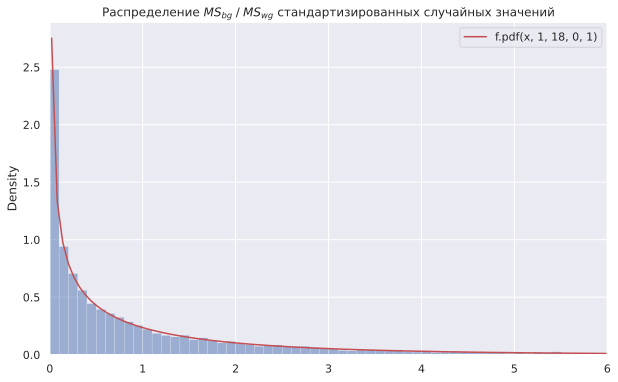

In [21]:
N = 10000
samples_1 = stats.norm.rvs(loc=0, scale=1, size=(N, 10))
samples_2 = stats.norm.rvs(loc=0, scale=1, size=(N, 10))

m1 = samples_1.mean(axis=1)
m2 = samples_2.mean(axis=1)
m = np.hstack((samples_1, samples_2)).mean(axis=1)

ms_bg = 10*((m1 - m)**2 + (m2 - m)**2)
ss_1 = np.sum((samples_1 - m1.reshape(N, 1))**2, axis=1)
ss_2 = np.sum((samples_2 - m2.reshape(N, 1))**2, axis=1)
ms_wg = (ss_1 + ss_2)/18

statistics = ms_bg/ms_wg

f, ax = plt.subplots()
x = np.linspace(0.02, 30, 500)
plt.plot(x, stats.f.pdf(x, dfn=1, dfd=18), color='r', label=f'f.pdf(x, 1, 18, 0, 1)')
plt.legend()
sns.histplot(x=statistics, binwidth=0.1, stat='density', alpha=0.5)
ax.set_xlim(0, 6)
ax.set_title(r'Распределение $MS_{bg} \; / \;MS_{wg}$ стандартизированных случайных значений')

Text(0.5, 1.0, 'Распределение $MS_{bg} \\; / \\;MS_{wg}$ нестандартизированных случайных значений')

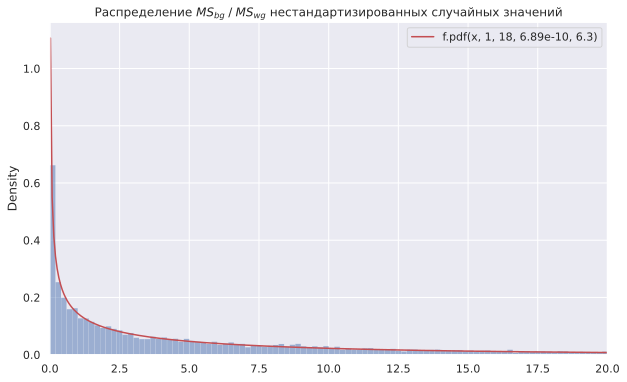

In [22]:
N = 10000
mu_1 = stats.uniform.rvs(loc=0, scale=5, size=(N, 1))
samples_1 = stats.norm.rvs(loc=mu_1, scale=2, size=(N, 10))
mu_2 = stats.uniform.rvs(loc=0, scale=5, size=(N, 1))
samples_2 = stats.norm.rvs(loc=mu_2, scale=2, size=(N, 10))

m1 = samples_1.mean(axis=1)
m2 = samples_2.mean(axis=1)
m = np.hstack((samples_1, samples_2)).mean(axis=1)

ms_bg = 10*((m1 - m)**2 + (m2 - m)**2)
ss_1 = np.sum((samples_1 - m1.reshape(N, 1))**2, axis=1)
ss_2 = np.sum((samples_2 - m2.reshape(N, 1))**2, axis=1)
ms_wg = (ss_1 + ss_2)/18

statistics = ms_bg/ms_wg

loc, scale = stats.f.fit(statistics, fdfn=1, fdfd=18)[-2:]

f, ax = plt.subplots()
x = np.linspace(0.02, 30, 500)
plt.plot(x, stats.f.pdf(x, dfn=1, dfd=18, loc=loc, scale=scale), color='r', label=f'f.pdf(x, 1, 18, {loc:.3}, {scale:.3})')
plt.legend()
sns.histplot(x=statistics, binwidth=0.2, stat='density', alpha=0.5)
ax.set_xlim(0, 20)
ax.set_title(r'Распределение $MS_{bg} \; / \;MS_{wg}$ нестандартизированных случайных значений')

Вы можете попробовать воспроизвести работу теста Левене, который реализован в SciPy как функция **levene()**. Этот тест (критерий) устроен точно так же, как однофакторный ANOVA, но проверяет гипотезу о равенстве дисперсий генеральных совокупностей:

In [23]:
stats.levene(x1, x2)

LeveneResult(statistic=0.0047521397921121405, pvalue=0.9458007897725039)

Тот факт, что центральная предельная теорема работает только для выборочного среднего, но не для выборочной дисперсии, очень легко продемонстрировать на следующем примере: сгенерируем 10000 выборок по 5 элементов в каждой из стандартных нормального, равномерного и лапласова распределений, а затем сравним, как будут распределены суммы квадратов элементов каждой выборки:

(0.0, 20.0)

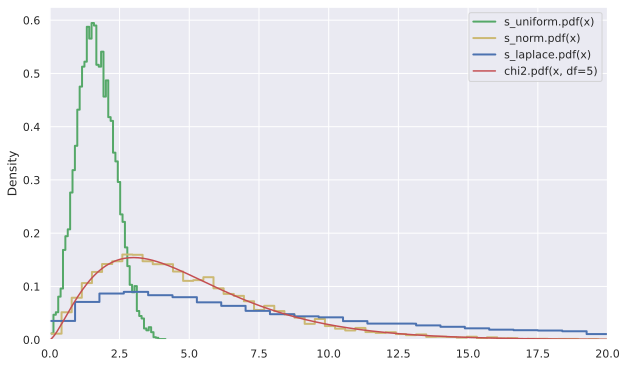

In [24]:
N, k = 10000, 5
func = [stats.uniform, stats.norm, stats.laplace]
color = list('gyb')
labels = ['s_uniform', 's_norm', 's_laplace']

for i in range(3):
    ss = np.square(func[i].rvs(size=(N, k))).sum(axis=1)
    sns.histplot(x=ss, stat='density', label=labels[i] + '.pdf(x)',
                 element='step', color=color[i], lw=2, fill=False)
x = np.linspace(0, 25, 300)
plt.plot(x, stats.chi2.pdf(x, df=5), color='r', label='chi2.pdf(x, df=5)')
plt.legend()
plt.xlim(0, 20)

Допустим, у нас есть вот такая выборка:

In [ ]:
array([0.40572556, 0.67443266, 0.38765587, 0.96540199, 0.57933085])

Давайте сгенерируем 50 тысяч выборок из нормального распределения по 5 элементов в каждой, отсортируем элементы в каждой выборке по возрастанию, а затем посмотрим, как распределены элементы в зависимости от индекса:

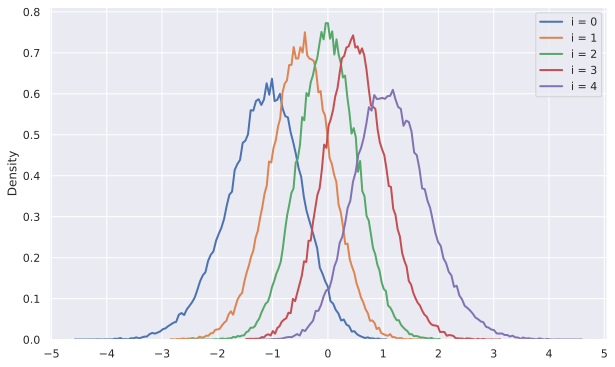

In [26]:
s = np.sort(stats.norm.rvs(size=(50000, 5)), axis=1).T
for i in range(5):
    sns.histplot(x=s[i], stat='density',
                 label='i = ' + str(i),
                 element='poly', lw=2, fill=False)
plt.xticks(np.arange(-5, 6))
plt.legend()

Мы могли бы сделать следующее:

* "на глазок" прикинуть тип распределения;

* подобрать параметры с помощью метода максимального правдоподобия;

* рассчитать вероятность совместного отклонения элементов выборки от вершины каждого распределения (рассчитать статистику);

* провести какое-то количество экспериментов, чтобы посмотреть как распределена плотность рассчитанной в предыдущем пункте вероятности (построить распределение статистики);

* определить критическую область.

Мы можем даже визуально прикинуть вероятность того, что какая-то выборка принадлежит нормальному распределению:

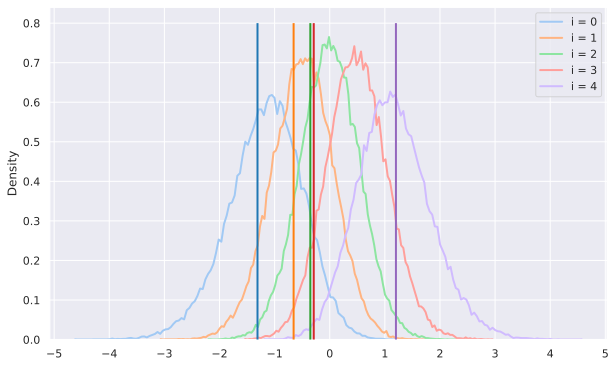

In [27]:
s = np.sort(stats.norm.rvs(size=(50000, 5)), axis=1).T
sample = np.sort(stats.norm.rvs(size=5))
colors = sns.color_palette('tab10', 5)
for i in range(5):
    sns.histplot(x=s[i], stat='density',
                 label='i = ' + str(i),
                 element='poly', lw=2, fill=False,
                 color=sns.color_palette('pastel', 5)[i])

    plt.vlines(sample[i], 0, 0.8, lw=2,  zorder=10,
               color=sns.color_palette('tab10', 5)[i])

plt.xticks(np.arange(-5, 6))
plt.legend()

Или что какая-то выборка вряд ли принадлежит нормальному распределению:

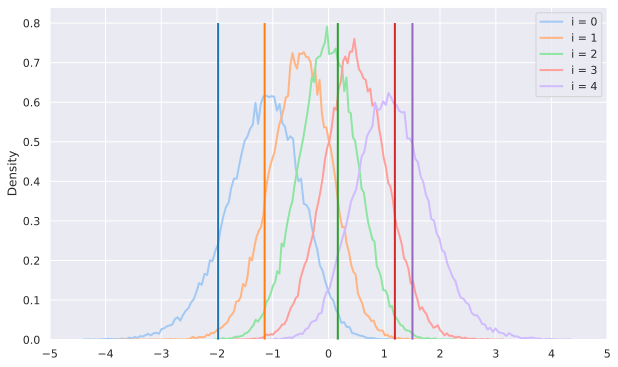

In [28]:
s = np.sort(stats.norm.rvs(size=(50000, 5)), axis=1).T
sample = np.sort(stats.uniform.rvs(loc=-2, scale=4, size=5))
colors = sns.color_palette('tab10', 5)
for i in range(5):
    sns.histplot(x=s[i], stat='density',
                 label='i = ' + str(i),
                 element='poly', lw=2, fill=False,
                 color=sns.color_palette('pastel', 5)[i])

    plt.vlines(sample[i], 0, 0.8, lw=2,  zorder=10,
               color=sns.color_palette('tab10', 5)[i])

plt.xticks(np.arange(-5, 6))
plt.legend()

В качестве простого примера мы можем рассмотреть критерий Колмогорова:

In [29]:
stats.ks_1samp(x1, stats.norm.cdf, args=(5, 1.5))

KstestResult(statistic=0.11452966409855592, pvalue=0.9971279018404035, statistic_location=5.85, statistic_sign=-1)

Для начала нам нужно вычислить эмпирические функции распределения вероятности и одну теоретическую, ту, с которой будет происходить сравнение:

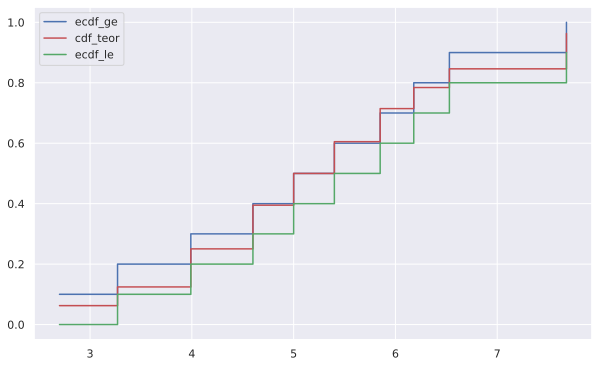

In [30]:
x1.sort()
n = len(x1)
ecdf_ge = np.r_[1:n+1]/n
ecdf_le = np.r_[0:n]/n
cdf_teor = stats.norm.cdf(x1, loc=5, scale=1.5)

plt.plot(x1, ecdf_ge, color='b', drawstyle='steps-post', label='ecdf_ge')
plt.plot(x1, cdf_teor, color='r', drawstyle='steps-post', label='cdf_teor')
plt.plot(x1, ecdf_le, color='g', drawstyle='steps-post', label='ecdf_le')
plt.legend()

Статистикой в данном критерии является максимальная попарная разность между значениями эмпирических функций и теоретической, т.е. максимальная разность между красными и синими ступеньками или красными и зелеными ступеньками:

In [31]:
d_plus = ecdf_ge - cdf_teor
d_minus = cdf_teor - ecdf_le
statistic = np.max([d_plus, d_minus])
statistic

0.11452966409855592

Данная статистика имеет вот такое распределение плотности вероятности (попробуйте построить график при n=5):

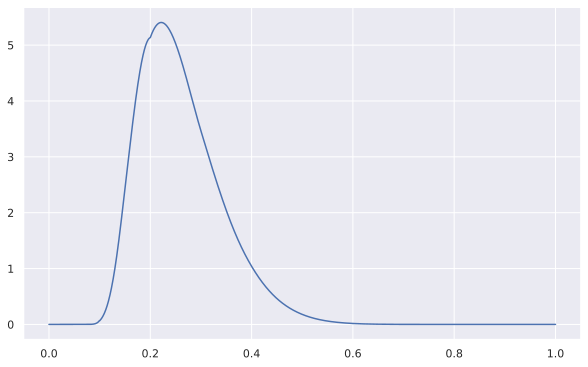

In [34]:
x = np.linspace(0, 1, 3000)
plt.plot(x, stats.kstwo.pdf(x, n))

Благодаря которому мы можем вычислить значение p-value:

In [35]:
pvalue = stats.kstwo.sf(statistic, n)
pvalue

0.9971279018404035

Не очень понятно, что из себя пердставляет **ecdf_le** (есть только смутные представления). А то, что **ecdf_le** вообще должна присутствовать в вычислениях, удалось понять только после просмотра исходников.

**Непараметрические тесты**

In [36]:
from IPython.display import display, Markdown
from itertools import product, combinations
import os

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import scipy.stats
import statsmodels.api as sm

In [37]:
if os.path.exists('src'):
    pass
else:
    !pip install scikit-posthocs

import scikit_posthocs as sp

Порядок вычисления Т-критерия Манна-Уитни таков.

* Данные обеих групп объединяют и упорядочивают по возрастанию. Ранг 1 присваивают наименьшему из всех значений, ранг 2 — следующему и так далее. Наибольший ранг присваивают самому большому среди значений в обеих группах. Если значения совпадают, им присваивают один и тот же средний ранг (например, если два значения поделили 3-е и 4-е места, обоим присваивают ранг 3,5).

* Для меньшей группы вычисляют Т — сумму рангов ее членов. Если численность групп одинакова, Т можно вычислить для любой из них.

* Полученное значение T сравнивают с критическими значениями. Если Т меньше или равно первому из них либо больше или равно второму, то нулевая гипотеза отвергается (различия статистически значимы).

**U-критерий Манна—Уитни** вместо Т вычисляет U, при этом *U* = *T* − *nм* (*nм* + 1) / 2, где  *nм* - численность меньшей из групп.

При численности групп, большей 8, распределение Т приближается к нормальному со средним
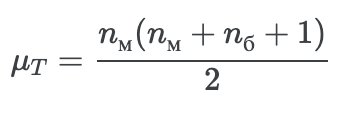
 и стандартным отклонением 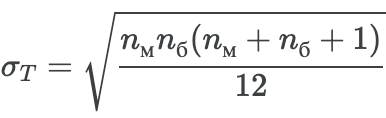, однако если некоторые значения совпадают, стандартное отклонение должно быть уменьшено согласно формуле: 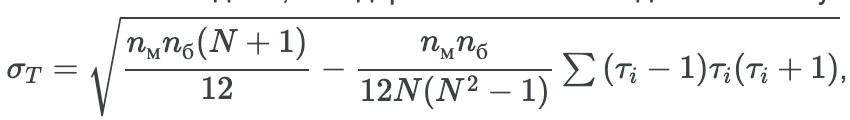, где *N* = *nм* + *nб* — общее число членов обеих выборок, *τi* — число значений i-го ранга, а суммирование производится по всем совпадающим рангам.

Тогда 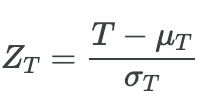 имеет стандартное нормальное распределение. Это позволяет сравнить *ZT* с критическими значениями нормального распределения. Более точный результат обеспечивает поправка Йейтса: 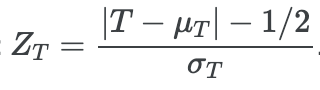.

Критерий Уилкоксона W — ранговый аналог парного критерия Стьюдента для сравнения "до" и "после" при отсутствии уверенности в нормальности распределения изменения.

* Вычислите величины изменений наблюдаемого признака. Отбросьте пары наблюдений, которым соответствует нулевое изменение.

* Упорядочите изменения по возрастанию их абсолютной величины и присвойте соответствующие ранги. Рангами одинаковых величин назначьте средние тех мест, которые они делят в упорядоченном ряду.

* Присвойте каждому рангу знак в соответствии с направлением изменения: если значение увеличилось — «+», если уменьшилось — «–».

* Вычислите сумму знаковых рангов W.

* Сравните полученную величину W с критическим значением. Если она больше критического значения, изменение показателя статистически значимо.

Если число пар измерений больше 20, то распределение W достаточно близко к нормальному со средним *μW* = 0 и стандартным отклонением 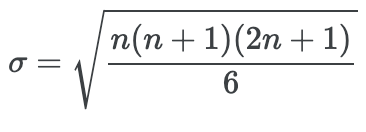 где n - число пар наблюдений (то есть численность группы).

Если некоторые значения совпадают, стандартное отклонение должно быть уменьшено в соответствии со следующей формулой:  
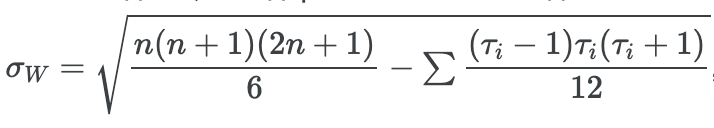, где n — численность группы, *τi* - число значений i-го ранга, а суммирование производится по всем совпадающим рангам.

Можно, таким образом, использовать (с правкой Йейтса на непрерывность): 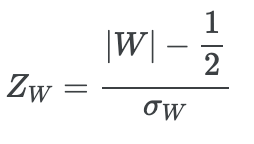

Чтобы выяснить, одинаково ли действие нескольких методов, каждый из которых испытывается на отдельной группе, нужно проделать следующее.

* Объединив все наблюдения, упорядочить их по возрастанию. Совпадающим значениям ранги присваиваются как среднее тех мест, которые делят между собой эти значения.
* Вычислить критерий Крускала—Уоллиса 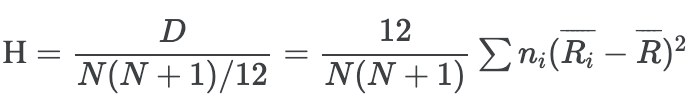. *ni* - численность i-й группы, 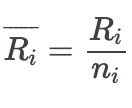 - средний ранг для i-й группы, 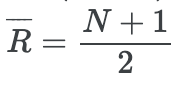 - средний ранг для объединенной группы.
* При большом числе совпадающих рангов значение H следует поделить на 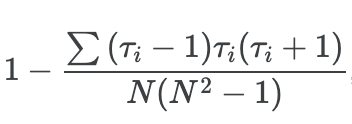, где N — число членов всех групп, *τi* — как обычно, число рангов в i-й связке, а суммирование производится по всем связкам.
* Сравнить вычисленное значение Н с критическим значением *χ*2
  для числа степеней свободы, на единицу меньшего числа групп. Если вычисленное значение Н окажется больше критического, различия групп статистически значимы.


!!! В случае трех групп приближение с помощью *χ*2 пригодно, если численность каждой группы не меньше 5.

Формула для непараметрического варианта критерия Ньюмена—Кейлса: 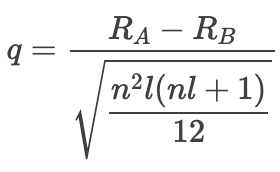, где *RA RB* — суммы рангов двух сравниваемых выборок, n — объем каждой выборки, l — интервал сравнения.

Значение непараметрического критерия Даннета определяется формулой: 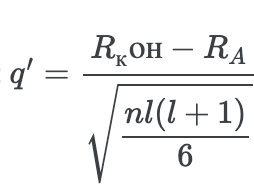 (l - число всех выборок, включая контрольную!).

Критерий Данна (для сравнения выборок разного объема): 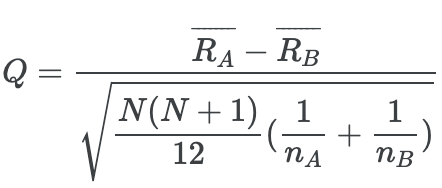, где 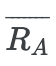 и 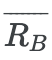 — средние ранги двух сравниваемых выборок, *nA* и *nB* — их объемы, а N — общий объем всех сравниваемых выборок.

Порядок расчета критерия Фридмана.

* Расположите значения для каждого "больного" по возрастанию, каждому значению присвойте ранг.
* Для каждого из методов лечения подсчитайте сумму присвоенных ему рангов.
* Вычислите значение 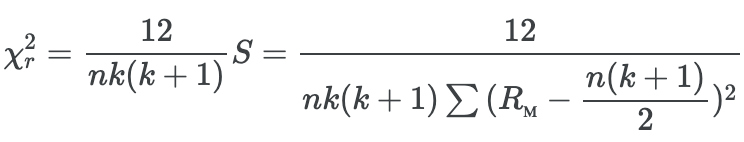, где S - сумма квадратов отклонений истинных сумм рангов, полученных каждым из методов, от средней суммы. *R*м — истинные суммы рангов для методов лечения, k - число методов лечения (моментов наблюдения), l - число больных.
* Если k=3 и n<10 или k=4 и n<5 критическое значение *χ*2*r* берется из таблицы. Если число методов лечения и число больных достаточно велико, воспользуйтесь критическим значением *χ*2 с числом степеней свободы ν = k – 1.
* Если рассчитанное значение *χ*2*r* превышает критическое — различия статистически значимы.

Поскольку число больных, подвергшихся каждому методу лечения, одинаково, для этой цели легко приспособить критерий Ньюмена—Кейлса: 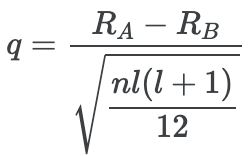 *RA* и *RB* — суммы рангов для двух сравниваемых методов лечения, l — интервал сравнения, а п — число больных.

Если считать один из методов лечения «контролем» (обычно первое измерение, т.е. начальное), то остальные можно сравнить с ним при помощи критерия Даннета: 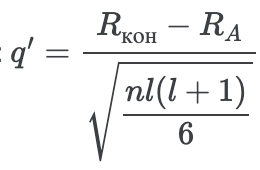 где l — число всех групп, включая контрольную, *R*кон — сумма рангов в контрольной группе.

Изменения, которые произошли в расходовании средств у врачей, представлены в таблице:

**Обследование** - Среднегодовые расходы на обследование одного больного, долл.

**Лечение** - Среднегодовые расходы на лечение одного больного, долл.

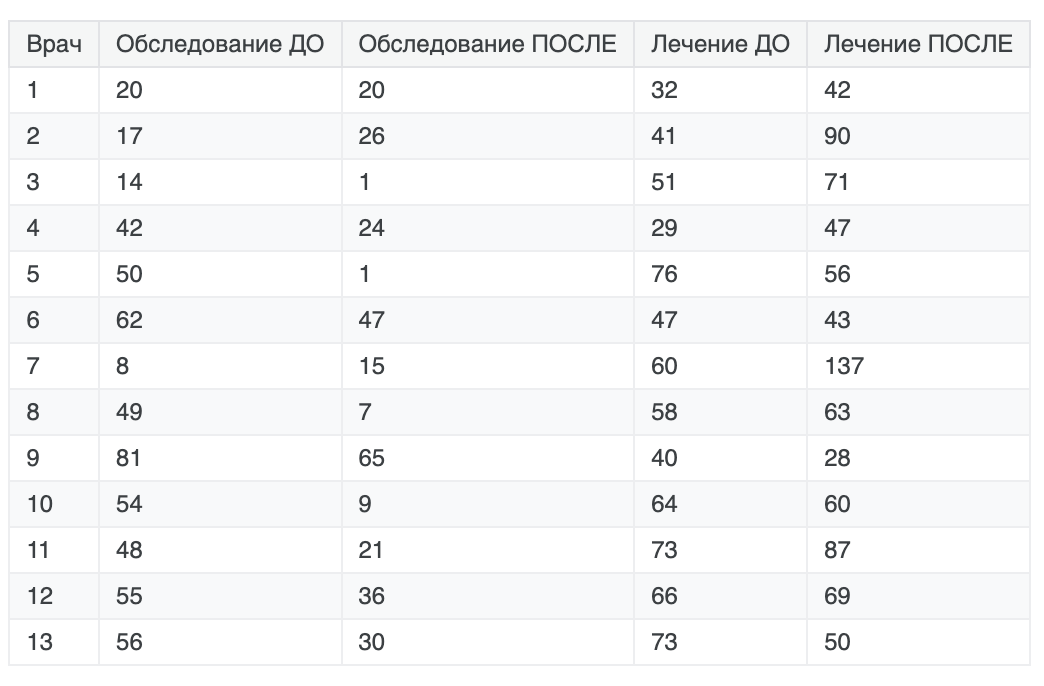

Как можно объяснить полученные результаты?

In [39]:
df = pd.DataFrame(data=[[20, 20, 32, 42], [17, 26, 41, 90], [14, 1, 51, 71], [42, 24, 29, 47], [50, 1, 76, 56],
                        [62, 47, 47, 43], [8, 15, 60, 137], [49, 7, 58, 63], [81, 65, 40, 28], [54, 9, 64, 60],
                        [48, 21, 73, 87], [55, 36, 66, 69], [56, 30, 73, 50]],
                  columns=pd.MultiIndex.from_tuples(product(["Среднегодовые расходы на обследование одного больного, долл.",
                                                             "Среднегодовые расходы на лечение одного больного, долл."],
                                                            ["До ознакомления с расходами", "После ознакомления с расходами"])))

display(df)

Среднегодовые расходы на обследование одного больного, долл.  \
                                    До ознакомления с расходами   
0                                                  20             
1                                                  17             
2                                                  14             
3                                                  42             
4                                                  50             
5                                                  62             
6                                                   8             
7                                                  49             
8                                                  81             
9                                                  54             
10                                                 48             
11                                                 55             
12                                                 56             

                                   \
   После ознакомления с расходами   
0                              20   
1                              26   
2                               1   
3                              24   
4                               1   
5                              47   
6                              15   
7                               7   
8                              65   
9                               9   
10                             21   
11                             36   
12                             30   

   Среднегодовые расходы на лечение одного больного, долл.  \
                               До ознакомления с расходами   
0                                                  32        
1                                                  41        
2                                                  51        
3                                                  29        
4                                                  76        
5                                                  47        
6                                                  60        
7                                                  58        
8                                                  40        
9                                                  64        
10                                                 73        
11                                                 66        
12                                                 73        

                                   
   После ознакомления с расходами  
0                              42  
1                              90  
2                              71  
3                              47  
4                              56  
5                              43  
6                             137  
7                              63  
8                              28  
9                              60  
10                             87  
11                             69  
12                             50

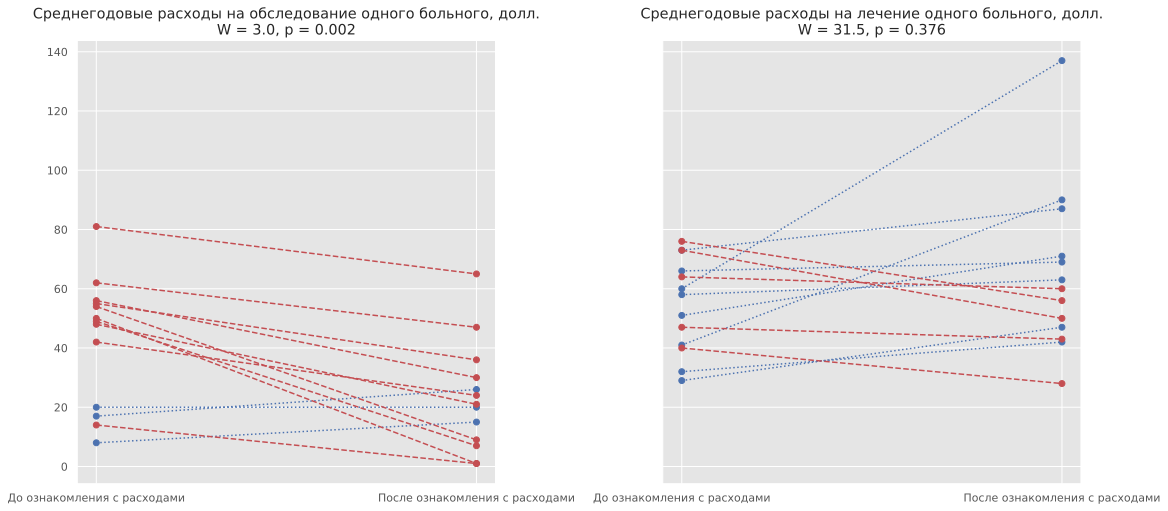

In [40]:
fig, axs = plt.subplots(1, 2, figsize=(18, 8), sharey=True)
plt.subplots_adjust(wspace=0.4)

for i, c in enumerate(df.columns.get_level_values(0).unique()):
    W, p = scipy.stats.wilcoxon((df[(c, "После ознакомления с расходами")] - df[(c, "До ознакомления с расходами")]).pipe(lambda x: x[x!=0]), correction=True)
    axs[i].set_title(f"{c}\nW = {W}, p = {p:.3f}")

    axs[i].plot(df[c].query("`После ознакомления с расходами` >= `До ознакомления с расходами`").T, ":bo")
    axs[i].plot(df[c].query("`После ознакомления с расходами` < `До ознакомления с расходами`").T, "--ro")

Расходы на обследование снизились, на лечение остались прежними.

In [41]:
df_ = df.swaplevel(0, 1, 1).sort_index(axis=1, ascending=[True, False])

for i, c in enumerate(df_.columns.get_level_values(0).unique()):
    rs, p = scipy.stats.spearmanr(df_[c])
    print(f"{c}:\n\trs={rs}, p={p}")

До ознакомления с расходами:
	rs=0.20082549947646627, p=0.5106140548453252
После ознакомления с расходами:
	rs=-0.37964272503770335, p=0.20073526018875068


Проницаемость сосудов сетчатки:

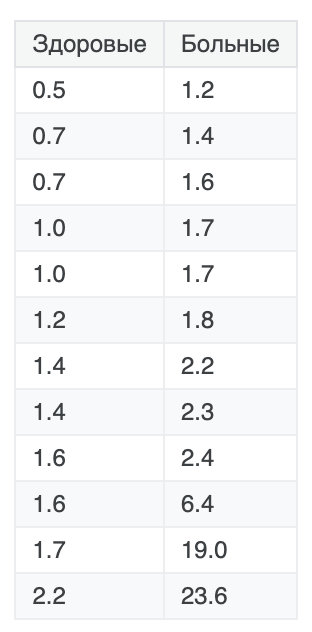

Если выводы не подтверждают гипотезу о различии в проницаемости сосудов сетчатки — попробуем выяснить, в чем причина различия.

In [42]:
df = pd.DataFrame(data=[[0.5, 1.2], [0.7, 1.4], [0.7, 1.6], [1.0, 1.7], [1.0, 1.7],
                        [1.2, 1.8], [1.4, 2.2], [1.4, 2.3], [1.6, 2.4], [1.6, 6.4],
                        [1.7, 19.0], [2.2, 23.6]],
                  columns=["Здоровые", "Больные"])

display(df)

,Здоровые,Больные
0,0.5,1.2
1,0.7,1.4
2,0.7,1.6
3,1.0,1.7
4,1.0,1.7
5,1.2,1.8
6,1.4,2.2
7,1.4,2.3
8,1.6,2.4
9,1.6,6.4


**Попробуем критерий Стьюдента:**

In [43]:
scipy.stats.ttest_ind(df["Здоровые"], df["Больные"])

TtestResult(statistic=-1.9079041515993858, pvalue=0.06954032984519397, df=22.0)

Критерий Стьюдента требует нормальности распределения, что не соответствует действительности для группы больных.

### Здоровые

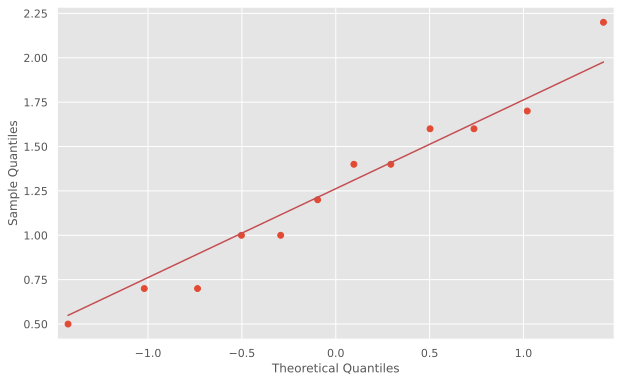

Shapiro-Wilk: ShapiroResult(statistic=0.966788628284738, pvalue=0.8744288028468543)
Kolmogorov-Smirnov test: (0.1191797683540955, 0.9081292361523237)


___

### Больные

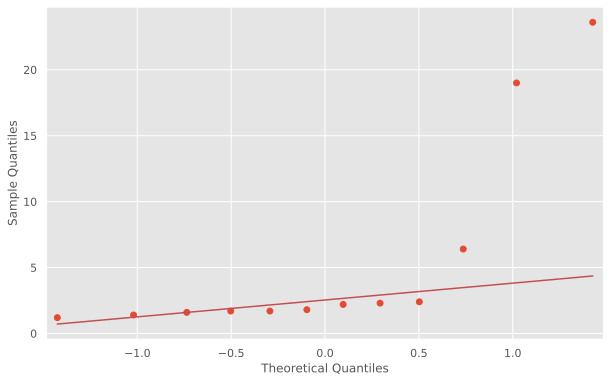

Shapiro-Wilk: ShapiroResult(statistic=0.5944611141074442, pvalue=9.647920985640874e-05)
Kolmogorov-Smirnov test: (0.40560824355765557, 0.0009999999999998899)


___

In [44]:
for c in df.columns:
    display(Markdown(f'### {c}'))
    sm.qqplot(df[c], line='q');
    plt.show()
    print(f"Shapiro-Wilk: {scipy.stats.shapiro(df[c])}")
    print(f"Kolmogorov-Smirnov test: {sm.stats.lilliefors(df[c])}")
    display(Markdown("___"))

Как видно, проницаемость сосудов у больных не подчиняется нормальному распределению, из-за чего использование критерия Стьюдента не корректно, необходимо воспользоваться непараметрическим критерием Манна-Уитни.

In [45]:
U, p = scipy.stats.mannwhitneyu(df["Здоровые"], df["Больные"], alternative='two-sided')

print(f"Результат применения критерия Манна-Уитни: U={U}, p={p:.3f}")

Результат применения критерия Манна-Уитни: U=19.0, p=0.002


Проницаемость сосудов сетчатки:

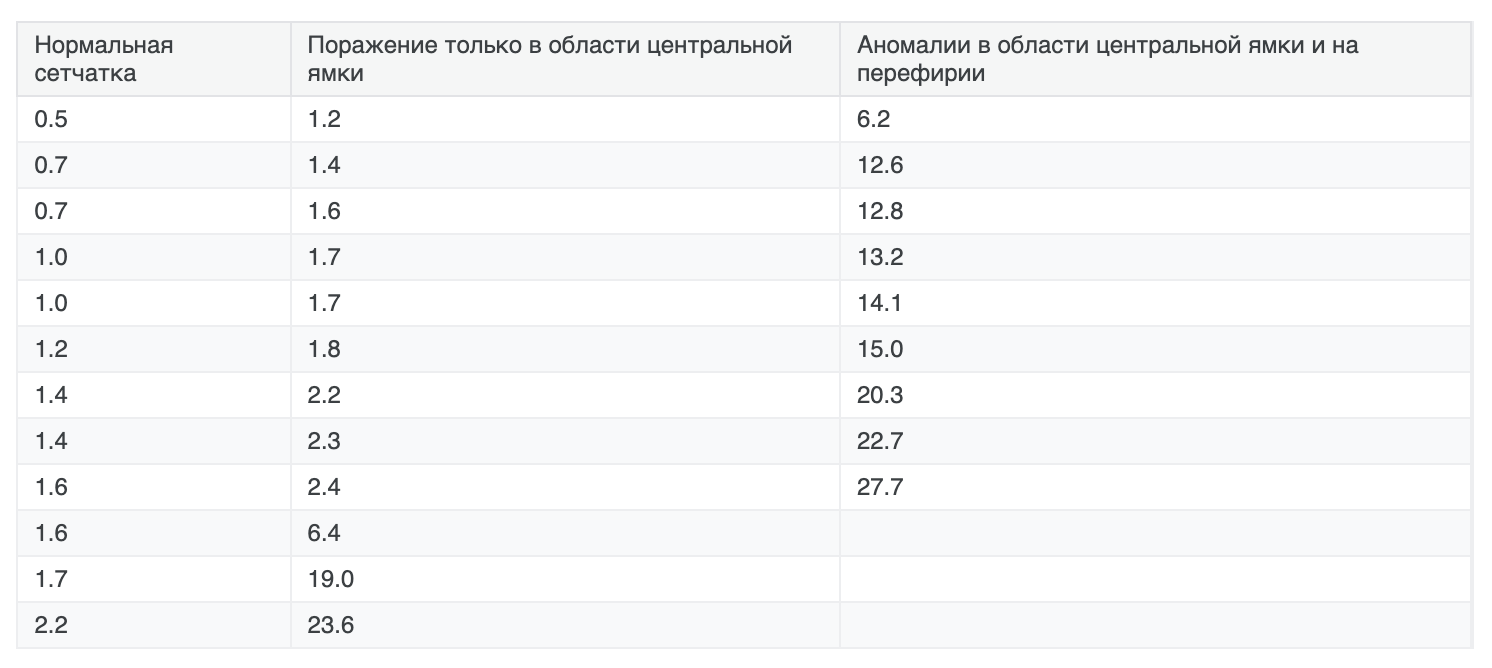

In [46]:
df = pd.DataFrame(data=[[0.5, 1.2, 6.2], [0.7, 1.4, 12.6], [0.7, 1.6, 12.8], [1.0, 1.7, 13.2], [1.0, 1.7, 14.1],
                        [1.2, 1.8, 15.0], [1.4, 2.2, 20.3], [1.4, 2.3, 22.7], [1.6, 2.4, 27.7], [1.6, 6.4, ],
                        [1.7, 19.0, ], [2.2, 23.6, ]],
                  columns=["Нормальная сетчатка", "Поражение только в области центральной ямки", "Аномалии в области центральной ямки и на перефирии"])

display(df)

,Нормальная сетчатка,Поражение только в области центральной ямки,Аномалии в области центральной ямки и на перефирии
0,0.5,1.2,6.2
1,0.7,1.4,12.6
2,0.7,1.6,12.8
3,1.0,1.7,13.2
4,1.0,1.7,14.1
5,1.2,1.8,15.0
6,1.4,2.2,20.3
7,1.4,2.3,22.7
8,1.6,2.4,27.7
9,1.6,6.4,NaN


Критерий Крускала-Уоллиса

In [47]:
H, p = scipy.stats.kruskal(*[df[c].dropna() for c in df.columns])

print(f"H={H:.3f}, p={p:.3f}")

H=20.712, p=0.000


Длительность нагрузки до развития приступа стенокардии, секунды:

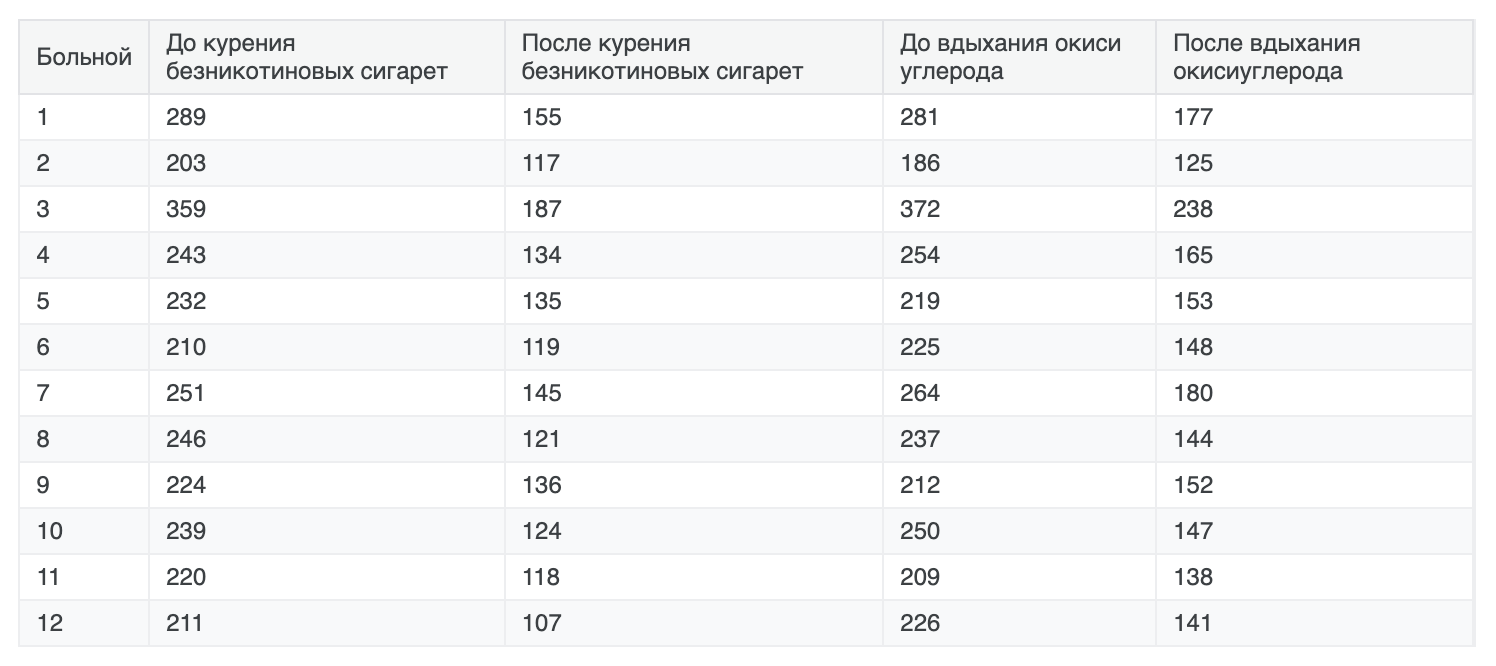

Какие выводы позволяют сделать эти данные?

In [48]:
df = pd.DataFrame(data=[[289, 155, 281, 177], [203, 117, 186, 125], [359, 187, 372, 238], [243, 134, 254, 165], [232, 135, 219, 153],
                        [210, 119, 225, 148], [251, 145, 264, 180], [246, 121, 237, 144], [224, 136, 212, 152], [239, 124, 250, 147],
                        [220, 118, 209, 138], [211, 107, 226, 141]],
                  columns=  #["До курения безникотиновых сигарет", "После курения безникотиновых сигарет", "До вдыхания окиси углерода", "После вдыхания окисиуглерода"]
                  pd.MultiIndex.from_tuples(product(["Курение безникотиновых сигарет", "Вдыхание окисиуглерода"], ["До", "После"])))


display(df)

Курение безникотиновых сигарет       Вдыхание окисиуглерода      
                               До После                     До После
0                             289   155                    281   177
1                             203   117                    186   125
2                             359   187                    372   238
3                             243   134                    254   165
4                             232   135                    219   153
5                             210   119                    225   148
6                             251   145                    264   180
7                             246   121                    237   144
8                             224   136                    212   152
9                             239   124                    250   147
10                            220   118                    209   138
11                            211   107                    226   141

Проверка на нормальность:

### ('Курение безникотиновых сигарет', 'До')

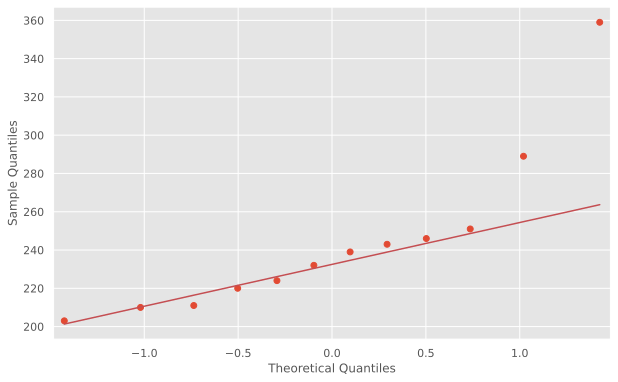

Shapiro-Wilk: ShapiroResult(statistic=0.7935281851655437, pvalue=0.007916157436685181)


___

### ('Курение безникотиновых сигарет', 'После')

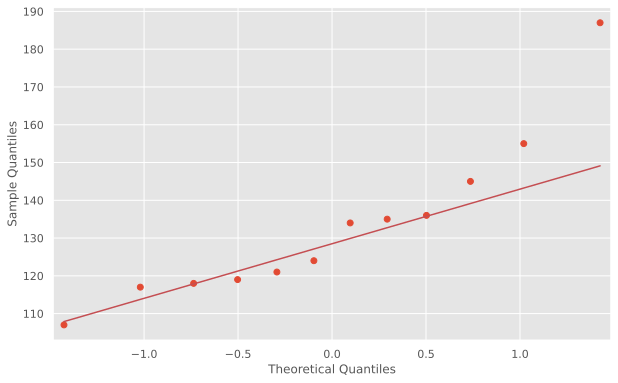

Shapiro-Wilk: ShapiroResult(statistic=0.8757364481706206, pvalue=0.07730755427269945)


___

### ('Вдыхание окисиуглерода', 'До')

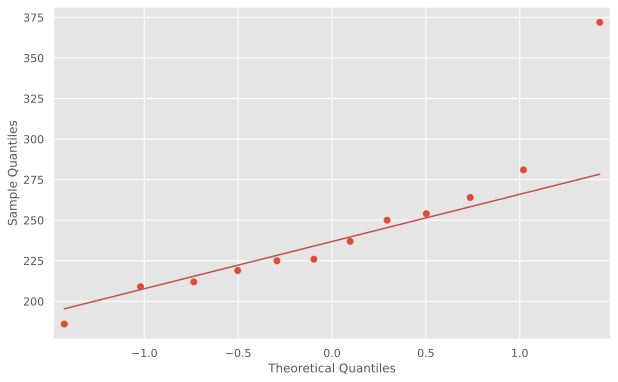

Shapiro-Wilk: ShapiroResult(statistic=0.8459202306251735, pvalue=0.03270384974422365)


___

### ('Вдыхание окисиуглерода', 'После')

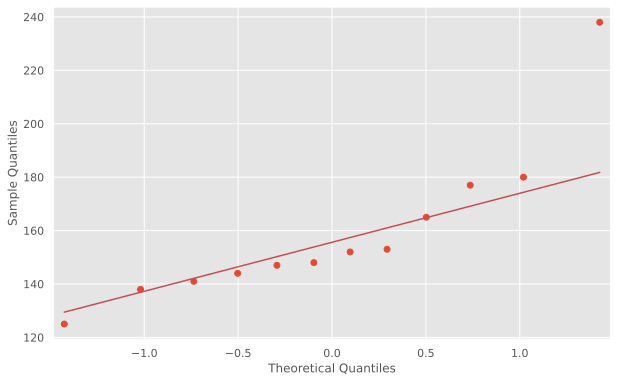

Shapiro-Wilk: ShapiroResult(statistic=0.8171548387638008, pvalue=0.014778562349634696)


___

In [49]:
for c in df.columns:
    display(Markdown(f'### {c}'))
    sm.qqplot(df[c], line='q');
    plt.show()
    print(f"Shapiro-Wilk: {scipy.stats.shapiro(df[c])}")
    display(Markdown("___"))

Критерий Уилкоксона показывает статистическое отличие парных наблюдений до и после (в целом, это избыточно, поскольку все изменения одного знака)

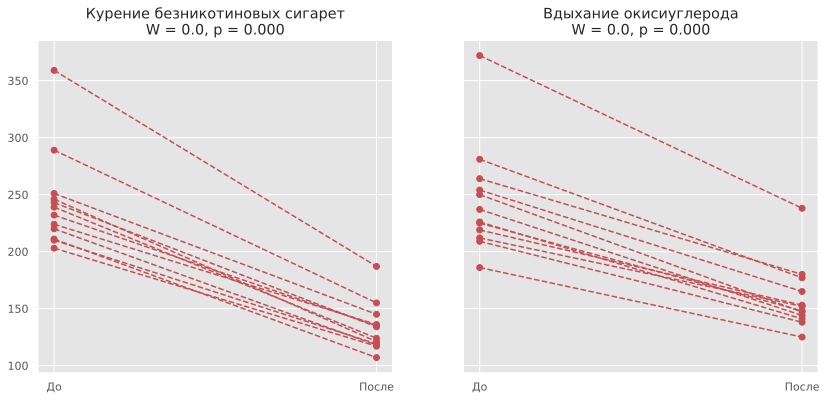

In [50]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

for i, c in enumerate(["Курение безникотиновых сигарет", "Вдыхание окисиуглерода"]):
    W, p = scipy.stats.wilcoxon((df[(c, "После")] - df[(c, "До")]).pipe(lambda x: x[x!=0]), correction=True)
    axs[i].set_title(f"{c}\nW = {W}, p = {p:.3f}")

    axs[i].plot(df[c].query("До <= После")[["До", "После"]].T, ":bo");
    axs[i].plot(df[c].query("До > После")[["До", "После"]].T, "--ro");

Применим критерий Фридмана (поскольку у нас повторные измерения)

In [51]:
chi2r, p = scipy.stats.friedmanchisquare(*[df[c].dropna() for c in df.columns])

print(f"chi2r={chi2r:.3f}, p={p:.3f}")

chi2r=32.400, p=0.000


Попробуем определить различия между группами, для этого необходимо применить критерий Фридмана с повторными измерениями.

In [52]:
df_ = df.copy()
df_.columns = ["_".join(col) for col in df_.columns]

In [59]:
pcf = sp.posthoc_conover_friedman(
    df_.reset_index().melt(id_vars="index"),
    y_col='value',
    block_col="index",
    group_col="variable",
    block_id_col="index",  # Добавляем идентификатор блока
    melted=True
)
pcf

,Курение безникотиновых сигарет_До,Курение безникотиновых сигарет_После,Вдыхание окисиуглерода_До,Вдыхание окисиуглерода_После,block_id
Курение безникотиновых сигарет_До,1.000000e+00,1.517193e-20,1.000000e+00,7.799362e-13,2.542550e-26
Курение безникотиновых сигарет_После,1.517193e-20,1.000000e+00,1.517193e-20,3.950078e-08,3.950078e-08
Вдыхание окисиуглерода_До,1.000000e+00,1.517193e-20,1.000000e+00,7.799362e-13,2.542550e-26
Вдыхание окисиуглерода_После,7.799362e-13,3.950078e-08,7.799362e-13,1.000000e+00,5.578671e-17
block_id,2.542550e-26,3.950078e-08,2.542550e-26,5.578671e-17,1.000000e+00
